# Machine Learning in TensorFlow and Keras

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/datasci-w266/2025-spring-main/blob/master/assignment/a1/TensorFlow.ipynb)

### Brief Review of Machine Learning

In supervised learning, parametric models are those where the model is a function of a fixed form with a number of unknown _parameters_.  Together with a loss function and a training set, an optimizer can select parameters to minimize the loss with respect to the training set.  Common optimizers include stochastic gradient descent.  It tweaks the parameters slightly to move the loss "downhill" due to a small batch of examples from the training set.

### Linear & Logistic Regression

You've likely seen linear regression before.  In linear regression, we fit a line (technically, hyperplane) that predicts a target variable, $y$, based on some features $x$.  The form of this model is affine (even if we call it "linear"):  

$$y_{hat} = xW + b$$

where $W$ and $b$ are weights and an offset, respectively, and are the parameters of this parametric model.  The loss function that the optimizer uses to fit these parameters is the squared error ($||\cdots||_2$) between the prediction and the ground truth in the training set.

You've also likely seen logistic regression, which is tightly related to linear regression.  Logistic regression also fits a line - this time separating the positive and negative examples of a binary classifier.  The form of this model is similar:

$$y_{hat} = \sigma(xW + b)$$

where again $W$ and $b$ are the parameters of this model, and $\sigma$ is the [sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function) which maps un-normalized scores ("logits") to values $\hat{y} \in [0,1]$ that represent probabilities. The loss function that the optimizer uses to fit these parameters is the [cross entropy](../../materials/lesson_notebook/lesson_1_NN_Review.ipynb) between the prediction and the ground truth in the training set.

This pattern of an affine transform, $xW + b$, occurs over and over in machine learning.

### Preliminaries...

Before we do anything else, let's load our data and take a quick look at it.  In this example, we're going to build a (very) simple binary classifier based on two floating point features.

In [1]:
import numpy as np

def generate_data(num_train, num_test):
    np.random.seed(1)
    num = num_train + num_test
    x0 = np.random.randn(num, 2) + 3.*np.array([1, 0])
    x1 = np.random.randn(num, 2) + 1.*np.array([-1, 0])
    X = np.vstack([x0, x1])
    y = np.concatenate([
        np.zeros(num), np.ones(num)])

    # Randomly shuffle the data
    shuf_idx = np.random.permutation(len(y))
    X = X[shuf_idx]
    y = y[shuf_idx]

    return X[:num_train], y[:num_train], X[num_train:num], y[num_train:num]


def generate_non_linear_data(num_train, num_test):
    np.random.seed(1)
    num = num_train + num_test
    x0 = np.random.randn(num, 2) + 4.*np.array([1, 0])
    x1 = np.random.randn(num, 2) + 4.*np.array([0, 1])
    x2 = np.random.randn(num, 2) + 4.*np.array([-1, 0])
    x3 = np.random.randn(num, 2) + 4.*np.array([0, -2])
    X = np.vstack([x0, x1, x2, x3])
    y = np.concatenate([
        np.zeros(num), np.ones(num),
        np.zeros(num), np.ones(num)])

    # Randomly shuffle the data
    shuf_idx = np.random.permutation(len(y))
    X = X[shuf_idx]
    y = y[shuf_idx]

    return X[:num_train], y[:num_train], X[num_train:num], y[num_train:num]

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

(2500, 2)
(500, 2)


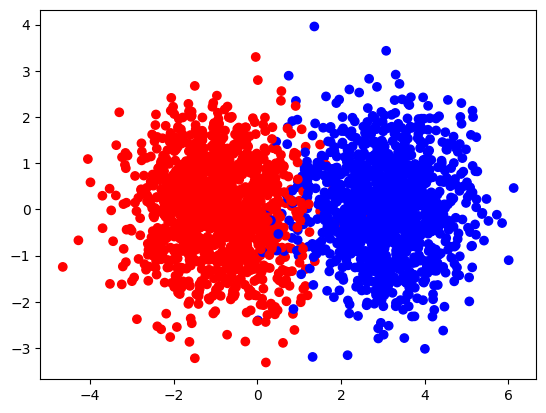

In [3]:
X_train, y_train, X_test, y_test = generate_data(2500, 500) #large test size to make diagrams better
print(X_train.shape)
print(X_test.shape)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='bwr');

### Training Logistic Regression

It's clear that the data is separable with a vertical line.  The simplest model we can use for this data is logistic regression.  Let's do that.

In [4]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.17.1


In [5]:
#####
## MAKE SURE YOU UNDERSTAND THIS CODE!!
##
## Look up keras.Sequential and keras.layers.Dense!
##
## You will need to use them to write your own model down below!
#####

# Sequential models are ones where the set of specified layers are stacked each on top of the previous.
linear_model = keras.Sequential([
    # Dense is an affine (xW + b) layer followed by an element wise nonlinearity.
    keras.layers.Dense(1, activation='sigmoid')
])

# adam optimizer is a fancier version of gradient descent.  You can read more about it here: https://arxiv.org/pdf/1412.6980.pdf
linear_model.compile(optimizer='adam',
              loss='binary_crossentropy',  # From information theory notebooks.
              metrics=['accuracy'])        # What metric to output as we train.

linear_model.fit(X_train, y_train, epochs=15)

Epoch 1/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6989 - loss: 0.5982
Epoch 2/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7493 - loss: 0.5175  
Epoch 3/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7808 - loss: 0.4612  
Epoch 4/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8207 - loss: 0.4168
Epoch 5/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8367 - loss: 0.3870  
Epoch 6/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8616 - loss: 0.3570  
Epoch 7/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8966 - loss: 0.3093
Epoch 8/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8996 - loss: 0.2923
Epoch 9/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9013 - loss: 0.2881
Epoch 10/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9287 - loss: 0.2519
Epoch 11/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9330 - loss: 0.2400  
Epoch 12/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0

**Hint:** You should expect to see an initial loss here of 0.2 - 1.2.  This is because a well-initialized random classifier tends to output a uniform distribution.  For each example in the batch, we either compute the cross-entropy loss of the label (`[1, 0]` or `[0, 1]`) against the model's output (`~[0.5, 0.5]`).  Both cases result in $-\lg(0.5) = lg(2) = 1.0$.

Of course, your random classifier won't output exactly uniform distributions (it's random after all), but you should anticipate it being pretty close.  If it's not, your initialization may be broken and make it hard for your network to learn.

**[Optional]** Some technical details... if your randomly initialized network is outputting very confident predictions, the loss computed may be very large while at the same time the sigmoids in the network are likely in saturation, quickly shrinking gradients.  The result is that you make tiny updates in the face of a huge loss.

Let's use our model to make predictions on the test set:

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


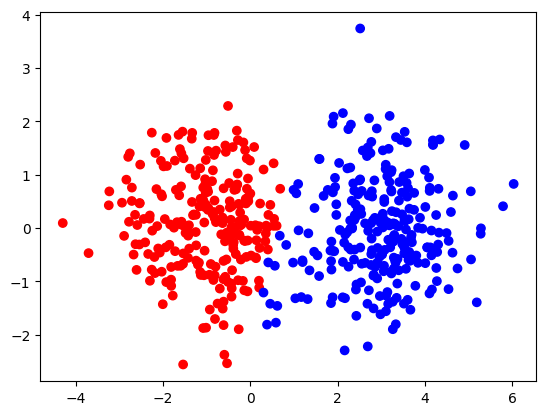

In [6]:
predictions = linear_model.predict(X_test)
plt.scatter(X_test[:,0], X_test[:,1], c=predictions[:,0]>0.5, cmap='bwr')

### But what about a harder problem?

The case above, the data was linearly separable making it susceptible to a linear classifier.

But what if you had data that looked more like this?

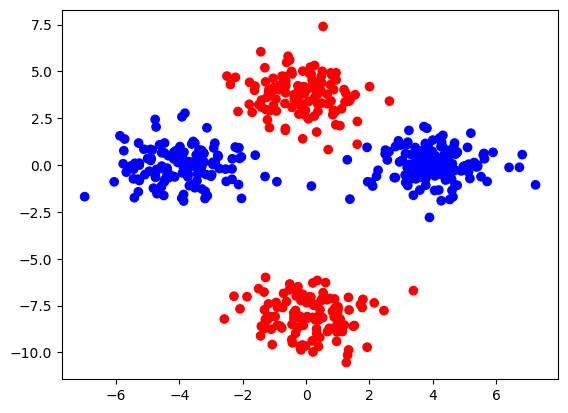

In [7]:
X_train, y_train, X_test, y_test = generate_non_linear_data(2500, 500)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap='bwr')

In [8]:
linear_model.fit(X_train, y_train, epochs=10)

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5214 - loss: 1.9362
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5459 - loss: 1.5166
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6167 - loss: 1.2730
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6788 - loss: 1.0526
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6770 - loss: 0.9884
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6803 - loss: 0.8773
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6608 - loss: 0.8256  
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6404 - loss: 0.7693
Epoch 9/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6079 - loss: 0.7266
Epoch 10/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5778 - loss: 0.7058


Again, let's make predictions on the test set...

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


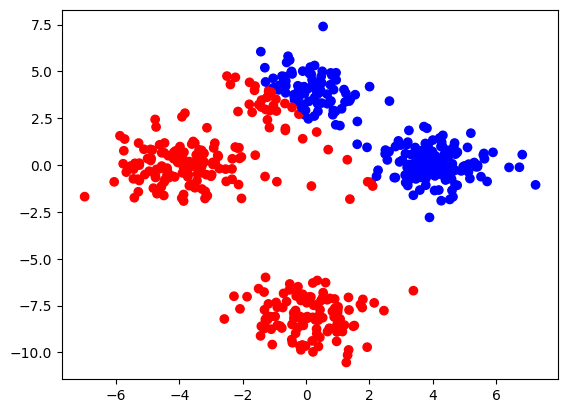

In [9]:
predictions = linear_model.predict(X_test)
plt.scatter(X_test[:,0], X_test[:,1], c=predictions[:,0]>0.5, cmap='bwr')

That isn't very good!

### Building a deeper network with the Sequential API

Ok, now it's your turn.  Build a sequential neural network below and start to build intuition around the effects of the number of layers in the network and the number of neurons in each layer.  Try to achieve a loss less than 0.05.  Initialization is random, but try to make it happen "almost" always (e.g. at least 90% of the time). Let's look first at the number of layers.

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7693 - loss: 0.4801
Epoch 2/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9972 - loss: 0.0613
Epoch 3/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9967 - loss: 0.0163
Epoch 4/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9948 - loss: 0.0129
Epoch 5/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9983 - loss: 0.0075
Epoch 6/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9989 - loss: 0.0067
Epoch 7/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9986 - loss: 0.0058
Epoch 8/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9983 - loss: 0.0055
Epoch 9/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9976 - loss: 0.0059
Epoch 10/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9964 - loss: 0.0076
Epoch 11/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9986 - loss: 0.0055
Epoch 12/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9987 - loss: 0.0053


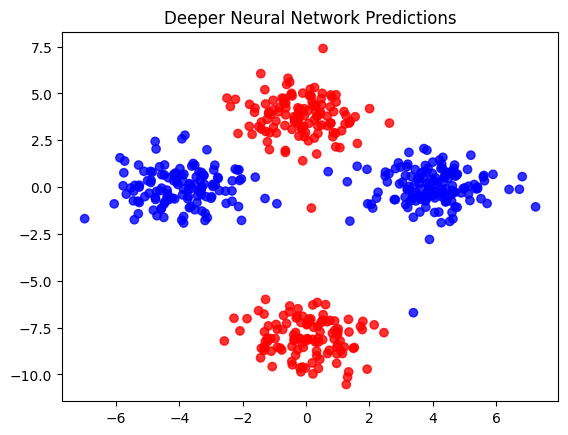

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5011 - loss: 1.7261  
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5195 - loss: 1.5125
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5009 - loss: 1.4514
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5235 - loss: 1.2311
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5077 - loss: 1.1791
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5120 - loss: 1.0677
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5142 - loss: 0.9838
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4997 - loss: 0.9064
Epoch 9/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4996 - loss: 0.8516
Epoch 10/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5119 - loss: 0.7939


In [28]:
narrow_model = keras.Sequential([
    #
    # Hint, try "relu" as your activation function.
    # relu(z) = max(0, z).
    #     Note that: relu(z) = z when z > 0
    #                relu(z) = 0 otherwise
    #
    # See https://en.wikipedia.org/wiki/File:Ramp_function.svg
    #
    # This is the most common nonlinearity for the main body of the network as its derivative is
    # either 0 or 1, depending on the value of z.
    #
    # This means that the gradient doesn't tend to explode or vanish as you multiply more partial
    # derivative terms together.
    #
    # For this problem...
    #
    # Try toying with the trade offs between more layers vs wider networks:
    #   If we keep repeating the same hidden layer with n neurons:
    #    What's the minimum number of hidden layers you can get away with given a larger value of n?
    #    For this exercise the value of n should be constant across all your layers and n > 5
])

# Build a sequential deep neural network
deep_model = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(2,)),  # Input layer with 32 neurons
    keras.layers.Dense(32, activation='relu'),                   # Hidden layer 1
    keras.layers.Dense(32, activation='relu'),                   # Hidden layer 2
    keras.layers.Dense(1, activation='sigmoid')                  # Output layer for binary classification
])

# Compile the model
deep_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

# Train the model
history = deep_model.fit(X_train, y_train, epochs=20, verbose=1)

# Evaluate the model on the test set
predictions = deep_model.predict(X_test)

# Visualize the predictions
plt.scatter(X_test[:, 0], X_test[:, 1], c=(predictions > 0.5).squeeze(), cmap='bwr', alpha=0.8)
plt.title("Deeper Neural Network Predictions")
plt.show()

# Think about why you still use a sigmoid at the top of your network.
narrow_model = keras.Sequential([
    keras.layers.Dense(1, activation='sigmoid')
])

narrow_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

narrow_model.fit(X_train, y_train, epochs=10)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


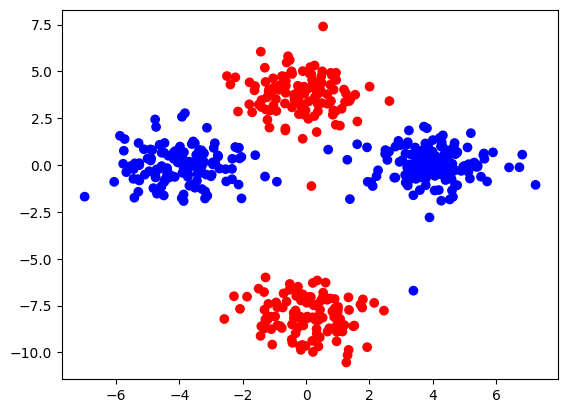

In [29]:
predictions = deep_model.predict(X_test)
plt.scatter(X_test[:,0], X_test[:,1], c=predictions[:,0]>0.5, cmap='bwr')

**Question 4**: What is the minimum number of hidden layers with the same number of neurons in each you can get away with and still achieve the desired loss on the training set?  2 Enter your answer in the answers file.

Epoch 1/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8911 - loss: 0.3680
Epoch 2/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9960 - loss: 0.0296
Epoch 3/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9975 - loss: 0.0108
Epoch 4/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9979 - loss: 0.0089
Epoch 5/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9965 - loss: 0.0080
Epoch 6/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9993 - loss: 0.0059
Epoch 7/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9969 - loss: 0.0089
Epoch 8/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9990 - loss: 0.0053
Epoch 9/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9977 - loss: 0.0058
Epoch 10/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9989 - loss: 0.0055
Epoch 11/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9979 - loss: 0.0056
Epoch 12/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9980 - lo

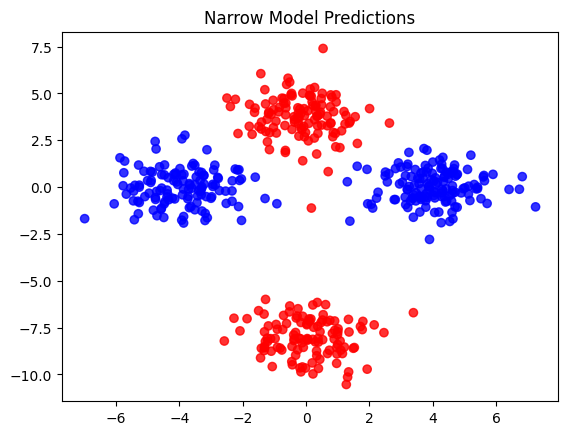

In [33]:
narrow_model = keras.Sequential([
    #
    # Hint, try "relu" as your activation function.
    # relu(z) = max(0, z).
    #     Note that: relu(z) = z when z > 0
    #                relu(z) = 0 otherwise
    #
    # See https://en.wikipedia.org/wiki/File:Ramp_function.svg
    #
    # This is the most common nonlinearity for the main body of the network as its derivative is
    # either 0 or 1, depending on the value of z.
    #
    # This means that the gradient doesn't tend to explode or vanish as you multiply more partial
    # derivative terms together.
    #
    # For this problem...
    #
    # Try toying with the trade offs between more layers vs wider networks:
    #   If we keep repeating the same hidden layer with n neurons:
    #    What's the smallest number of neurons (n) in each layer you can use
    #     if you use four or more layers?

    # Input layer
    keras.layers.Dense(32, activation='relu', input_shape=(2,)),  # Input layer with 32 neurons
    # Hidden layers
    keras.layers.Dense(32, activation='relu'),                   # Hidden layer 1
    keras.layers.Dense(32, activation='relu'),                   # Hidden layer 2
    # Output layer
    keras.layers.Dense(1, activation='sigmoid')                  # Output layer for binary classification
])

# Compile the model
narrow_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

# Train the model
history = narrow_model.fit(X_train, y_train, epochs=20, verbose=1)

# Evaluate the model on the test set
predictions = narrow_model.predict(X_test)

# Visualize the predictions
plt.scatter(X_test[:, 0], X_test[:, 1], c=(predictions > 0.5).squeeze(), cmap='bwr', alpha=0.8)
plt.title("Narrow Model Predictions")
plt.show()

# Think about why you still use a sigmoid at the top of your network.


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


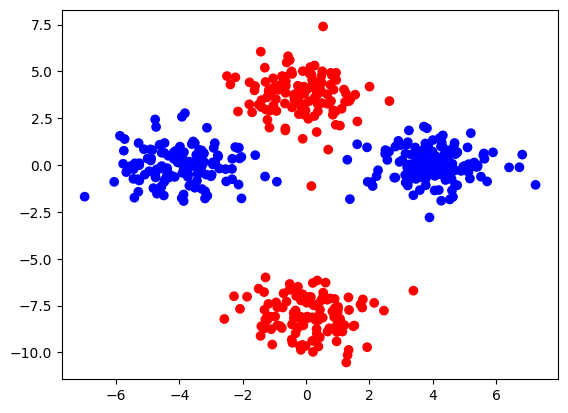

In [34]:
n_predictions = narrow_model.predict(X_test)
plt.scatter(X_test[:,0], X_test[:,1], c=n_predictions[:,0]>0.5, cmap='bwr')

**Question 5**: What is the smallest number of neurons you can use in a layer in the network with the largest number of layers and still get the desired loss on the training set? 16

### Keras Functional API

Finally, let's do some initial exploration of the Keras Functional API. The code above used a Sequential model, which is a simplified way to create a Tensorflow model using Keras. As you can see above, we can build a Sequential model just by listing some layers, which Keras will attach one after the other. If we want to do anything fancier, though, like have multiple inputs or outputs, we need to use the Functional API.

Let's imagine that we want to take the input features we used above, but now we want to pass the same input into two separate Dense layers, then compare the vectors that come out of them. There isn't a practical reason to do this right now, we're just getting familiar with some more Keras layer operations, that you might use in the future when you do have a reason (e.g. if you have two different types of input or you want to generate multiple different outputs).

With the Functional API, we first instantiate each layer, specifying any parameters like the dimension (number of neurons). Then, we "call" the layer we just created, using another set of parentheses to pass in whatever the input to that layer is. That's how we connect the layers, we save the output from one layer and then pass it as input to the layer that should come after. Essentially we will build our model by repeating:

```layer_output = layer(earlier_layer_output)```

The order in which we define the layers does not matter.  Once defined we can connect them.


We also have to explicitly define an input layer, so that we can pass it into the first hidden layer in the model. We also have to define an output layer.

You will redefine the sequential model you just created but do so using the functional API.



Epoch 1/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8190 - loss: 0.4373
Epoch 2/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9937 - loss: 0.0467
Epoch 3/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9952 - loss: 0.0184
Epoch 4/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9945 - loss: 0.0138
Epoch 5/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9958 - loss: 0.0108
Epoch 6/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9962 - loss: 0.0090
Epoch 7/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9955 - loss: 0.0122
Epoch 8/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9949 - loss: 0.0121
Epoch 9/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9925 - loss: 0.0164
Epoch 10/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9972 - loss: 0.0111
Epoch 11/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9964 - loss: 0.0099
Epoch 12/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9960 - lo

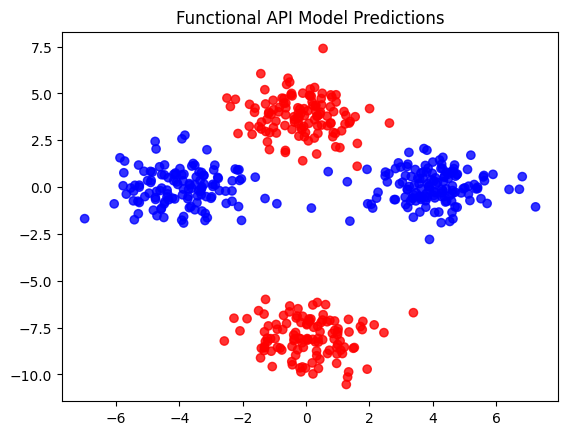

In [37]:
# Define the input layer
input_layer = keras.layers.Input(shape=(2,), dtype='int64')


#Here are the layers you should use

dense_1 = keras.layers.Dense(10, activation='relu')
dense_2 = keras.layers.Dense(10, activation='relu')
dense_3 = keras.layers.Dense(10, activation='relu')

# Now call the dense layers with the right input for each, to connect the network

### YOUR CODE HERE
from tensorflow.keras import layers, Model

# Define the input layer
input_layer = layers.Input(shape=(2,), dtype='int32')

# Define the layers
dense1 = layers.Dense(32, activation='relu')
dense2 = layers.Dense(32, activation='relu')
dense3 = layers.Dense(32, activation='relu')

# Call the dense layers with the right input for each, to connect the network
x = dense1(input_layer)  # Pass input through the first dense layer
x = dense2(x)            # Pass output of first layer to second
dense_3_out = dense3(x)  # Pass output of second layer to third

# Define the output layer
classification_layer = layers.Dense(1, activation='sigmoid')(dense_3_out)

# Build the functional model
functional_model = Model(inputs=input_layer, outputs=classification_layer)

# Compile the functional model
functional_model.compile(optimizer='adam',
                         loss='binary_crossentropy',
                         metrics=['accuracy'])

# Train the functional model
history = functional_model.fit(X_train, y_train, epochs=20, verbose=1)

# Evaluate the functional model on the test set
predictions = functional_model.predict(X_test)

# Visualize the predictions
plt.scatter(X_test[:, 0], X_test[:, 1], c=(predictions > 0.5).squeeze(), cmap='bwr', alpha=0.8)
plt.title("Functional API Model Predictions")
plt.show()


### END YOUR CODE


# Define a binary classification layer like we used in the model above
classification_layer = keras.layers.Dense(1, activation='sigmoid')(dense_3_out)

You've defined all of your layers and connnected them together. Now you just need a few more lines of code to define the overall model, then compile it and train it like you did with the Sequential model.

To define the model, you specify the initial inputs and final outputs. You've already defined how the layers are connected internally, so as long as there's a path from the initial inputs to the final outputs, you're good.

In [38]:
# Define the complete model, specifying the overall inputs and outputs
func_model = tf.keras.models.Model(inputs=[input_layer], outputs=[classification_layer])

# Compile the model, specifying the loss, optimizer, etc to use in training
func_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

func_model.fit(X_train, y_train, epochs=10)

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6874 - loss: 0.7198
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9974 - loss: 0.0248
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9951 - loss: 0.0151
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9935 - loss: 0.0166
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9947 - loss: 0.0131
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9980 - loss: 0.0082
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9972 - loss: 0.0106
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9952 - loss: 0.0088
Epoch 9/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9963 - loss: 0.0096
Epoch 10/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9952 - loss: 0.0098


**Question 6**:  What is the final accuracy score you get after training the functional model for 10 epochs?  Please copy and paste your answer in to the answers file. 0.9952

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


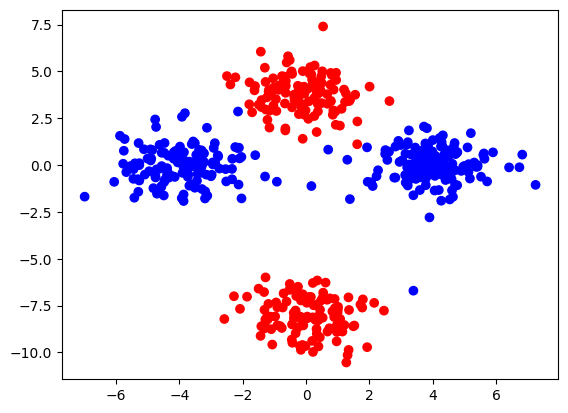

In [39]:
predictions = func_model.predict(X_test)
plt.scatter(X_test[:,0], X_test[:,1], c=predictions[:,0]>0.5, cmap='bwr')

# Congratulations...
... you've trained a nonlinear classifier with TensorFlow and Keras using the sequential and the functional APIs!